In [1]:
%matplotlib inline

import sys
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import constants
import root_pandas
from track_propagation_in_CDC import *

from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

Welcome to JupyROOT 6.24/00


# Create CDC model

### default values

In [2]:
cdc = CDC({})

### user specific values

In [3]:
# cdc_dummy = {
#     'A' : np.array([ -83.1,    108.2+15.0  ]), 
#     'B' : np.array([  158.6,   108.2+15.0  ]), 
#     'C' : np.array([ -68.2,    37.14  ]),  ## corresponds to C2 in TDR
#     'D' : np.array([  144.9,   43.80 ]),  
#     'E' : np.array([ -47.4,    24.95 ]),
#     'F' : np.array([   87.7,   24.95 ]), 
#     'G' : np.array([  -999,    16.0  ]),
#     'H' : np.array([  -999,    16.0 ]),
#     'rho_min'  : np.array([25.0, 40.0, 75.0,  100.0]),
#     'rho_max'  : np.array([35.0, 45.0, 90.0,  110.0]),
#     'nLayers'  : np.array([ 2,  1,   1,   1]),
#     'nCells'   : np.array([ 4,  3,   1,   2]),   
# }



# cdc = CDC(cdc_dummy)



# Input parameters of each track

In [4]:
d_trk1 = {
            'q':  1,            # charge (+1 or -1)
            'px': 1.10,         # x-component of the 3-momentum 
            'py': 0.89,         # y-component of the 3-momentum
            'pz': -0.29,        # z-component of the 3-momentum
            'prodVtxX': 4.39,   # x-component of the production vertex
            'prodVtxY': 3.21,   # y-component of the production vertex
            'prodVtxZ': -1.27,  # z-component of the production vertex
        }

d_trk2 = {
            'q':  -1,
            'px': 0.17,
            'py': 0.03,
            'pz': -0.07,
            'prodVtxX': 4.39,
            'prodVtxY': 3.21, 
            'prodVtxZ': -1.27, 
        }

d_trk3 = {
            'q':  -1,
            'px': 0.17,
            'py': 0.03,
            'pz': 0.5,
            'prodVtxX': 4.39,
            'prodVtxY': 50.1, 
            'prodVtxZ': 49.7, 
        }

# Compute trajectories and evaluate the number of CDC hits

In [5]:
step=0.1  # by default, the steps are in arc-length in the (x-y) plane

trk1 = Trajectory(d_trk1, cdc, step)  
trk2 = Trajectory(d_trk2, cdc, step) 
trk3 = Trajectory(d_trk3, cdc, step) 

print(f'step = {step}')
print(f'track1: {trk1.CDChits} CDC hits')
print(f'track2: {trk2.CDChits} CDC hits')
print(f'track3: {trk3.CDChits} CDC hits')

    
    

step = 0.1
track1: 55 CDC hits
track2: 53 CDC hits
track3: 13 CDC hits


In [6]:
trk1.points.head()

,phi,s,x,y,z,layer_id,cell_id,cumSum,nStepsIncell
0,0.680091,5.473866,4.427109,3.240020,-1.279783,-1,-1,1,114
1,0.679737,5.573866,4.504872,3.302892,-1.300278,-1,-1,1,114
2,0.679384,5.673866,4.582657,3.365737,-1.320773,-1,-1,1,114
3,0.679030,5.773866,4.660464,3.428555,-1.341269,-1,-1,1,114
4,0.678676,5.873866,4.738293,3.491345,-1.361764,-1,-1,1,114


# Make 2-d plots

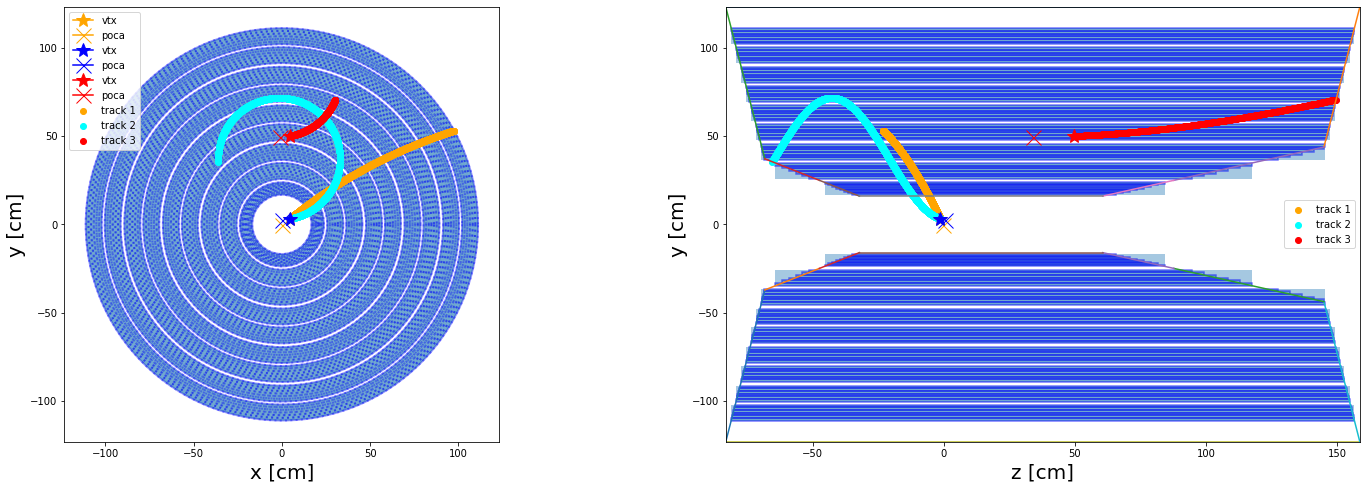

In [8]:
fig, axs = plt.subplots(1, 2, figsize = (25,8))


## (x-y) plane
ax = axs[0]
cdc.xy_contour(fig, ax)
# cdc.xy_cells(fig, ax) # if your model contains a lot of cells you may want to comment this line (it is slow)
trk1.xy_trajectory(ax, 'track 1', 'orange')
trk1.xy_vertex(ax, 'vtx', 'orange')
trk1.xy_poca(ax, 'poca', 'orange')

trk2.xy_trajectory(ax, 'track 2', 'cyan')
trk2.xy_vertex(ax, 'vtx', 'b')
trk2.xy_poca(ax, 'poca', 'b')

trk3.xy_trajectory(ax, 'track 3', 'red')
trk3.xy_vertex(ax, 'vtx', 'r')
trk3.xy_poca(ax, 'poca', 'r')
ax.legend()

## (z-y) plane
ax = axs[1]
cdc.zy_contour(fig, ax)
cdc.zy_layers(fig, ax) 
trk1.zy_trajectory(ax, 'track 1', 'orange')
trk1.zy_vertex(ax, '', 'orange')
trk1.zy_poca(ax, '', 'orange')

trk2.zy_trajectory(ax, 'track 2', 'cyan')
trk2.zy_vertex(ax, '', 'b')
trk2.zy_poca(ax, '', 'b')

trk3.zy_trajectory(ax, 'track 3', 'red')
trk3.zy_vertex(ax, '', 'r')
trk3.zy_poca(ax, '', 'r')
ax.legend()
plt.show();

# Make a 3-d plot [probably not needed]

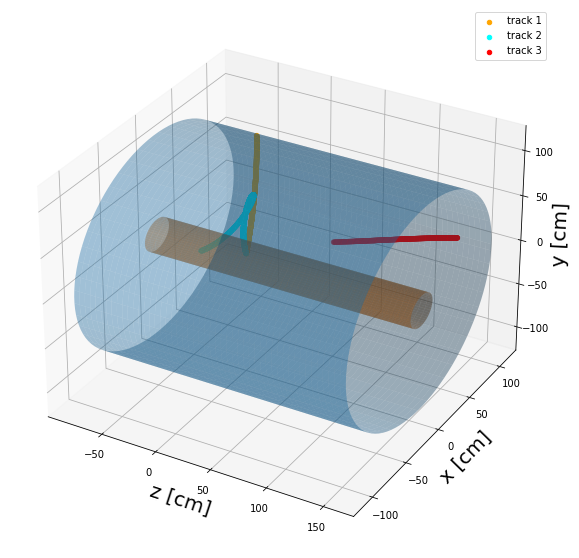

In [9]:
# %matplotlib notebook

def cylinder(r, h, a=0, nt=100, nv =50):
        """
        parametrize the cylinder of radius r, height h, base point a
        """
        theta = np.linspace(0, 2*np.pi, nt)
        v = np.linspace(a, a+h, nv )
        theta, v = np.meshgrid(theta, v)
        x = r*np.cos(theta)
        y = r*np.sin(theta)
        z = v
        return x, y, z

fig = plt.figure(figsize = (12,10))
ax = plt.axes(projection='3d')
# CHECK NUMBERS
x_outer, y_outer, z_outer = cylinder(r=cdc.rho_max[-1],h=2416.9*0.1, a=cdc.A[0])
x_inner, y_inner, z_inner = cylinder(r=cdc.rho_min[0], h=2416.9*0.1, a=cdc.A[0]) 
ax.plot_surface(z_outer, x_outer, y_outer, alpha = 0.4)   
ax.plot_surface(z_inner, x_inner, y_inner, alpha = 0.5)   

ax.scatter3D(trk1.points.z, trk1.points.y, trk1.points.x, c='orange', label='track 1')
ax.scatter3D(trk2.points.z, trk2.points.y, trk2.points.x, c='cyan',   label='track 2')
ax.scatter3D(trk3.points.z, trk3.points.y, trk3.points.x, c='red',   label='track 3')


ax.set_xlabel('z [cm]', fontsize=20)
ax.set_ylabel('x [cm]', fontsize=20)
ax.set_zlabel('y [cm]', fontsize=20)
plt.legend()

# plt.tight_layout()
plt.show()